In [210]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from scipy.stats import chi2_contingency

In [278]:
repos = pd.read_csv("repositories.csv")
Users = pd.read_csv("users.csv")

In [279]:
repos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44265 entries, 0 to 44264
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        44265 non-null  int64 
 1   login             44265 non-null  object
 2   full_name         44265 non-null  object
 3   created_at        44265 non-null  object
 4   stargazers_count  44265 non-null  int64 
 5   watchers_count    44265 non-null  int64 
 6   language          31867 non-null  object
 7   has_projects      44265 non-null  bool  
 8   has_wiki          44265 non-null  bool  
 9   license_name      15913 non-null  object
dtypes: bool(2), int64(3), object(5)
memory usage: 2.8+ MB


In [280]:
Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    726 non-null    int64  
 1   login         726 non-null    object 
 2   name          717 non-null    object 
 3   location      726 non-null    object 
 4   language      0 non-null      float64
 5   email         334 non-null    object 
 6   hireable      273 non-null    object 
 7   bio           636 non-null    object 
 8   public_repos  726 non-null    int64  
 9   followers     726 non-null    int64  
 10  following     726 non-null    int64  
 11  created_at    726 non-null    object 
 12  company       405 non-null    object 
dtypes: float64(1), int64(4), object(8)
memory usage: 73.9+ KB


In [281]:
repos['created_at'] = pd.to_datetime(repos['created_at'])
Users['created_at'] = pd.to_datetime(Users['created_at'])



In [282]:
Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Unnamed: 0    726 non-null    int64              
 1   login         726 non-null    object             
 2   name          717 non-null    object             
 3   location      726 non-null    object             
 4   language      0 non-null      float64            
 5   email         334 non-null    object             
 6   hireable      273 non-null    object             
 7   bio           636 non-null    object             
 8   public_repos  726 non-null    int64              
 9   followers     726 non-null    int64              
 10  following     726 non-null    int64              
 11  created_at    726 non-null    datetime64[ns, UTC]
 12  company       405 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(4), object(7)
memory

In [283]:
repos.drop("Unnamed: 0",axis=1,inplace=True)
Users.drop("Unnamed: 0",axis=1,inplace=True)

In [284]:
repos = repos.replace({np.NaN:"NaN"})
Users = Users.replace({np.NaN:"NaN"})

In [285]:
repos.head()

,login,full_name,created_at,stargazers_count,watchers_count,language,has_projects,has_wiki,license_name
0,0xRoneet,0xRoneet/mu-back,2024-10-25 21:51:33+00:00,0,0,JavaScript,True,True,NaN
1,0xRoneet,0xRoneet/mu-hacks,2024-10-25 21:18:03+00:00,0,0,JavaScript,True,True,NaN
2,0xRoneet,0xRoneet/Mumbai-Hacks,2024-10-25 15:04:05+00:00,0,0,TypeScript,True,True,NaN
3,0xRoneet,0xRoneet/DSA-Course-CPP,2024-10-24 11:08:47+00:00,1,1,NaN,True,True,mit
4,0xRoneet,0xRoneet/leetcode-company-wise-problems-2022,2024-09-08 07:31:42+00:00,0,0,NaN,True,True,mit


In [286]:
Users.head()

,login,name,location,language,email,hireable,bio,public_repos,followers,following,created_at,company
0,0xRoneet,Roneet Yadav,Navi-Mumbai,NaN,NaN,NaN,Prgrammer || Coder,38,102,145,2022-10-27 10:24:51+00:00,NaN
1,1407arjun,Arjun Sivaraman,"Mumbai, Maharashtra, India",NaN,NaN,NaN,20 | MERN Stack Developer | AppDev and WebDev,67,79,71,2021-01-02 14:30:45+00:00,"VELLOREINSTITUTEOFTECHNOLOGY,VELLORE"
2,5arthak01,Sarthak Agrawal,Navi Mumbai,NaN,sarthak.agrawal@research.iiit.ac.in,True,CS Undergrad at IIIT Hyderabad,27,54,90,2020-01-24 08:51:50+00:00,NaN
3,9vishwashah,VISHWA ALPESH SHAH,navi mumbai india,NaN,NaN,NaN,I am currently pursuing Diploma in AI&ML (Comp...,13,61,395,2022-04-22 13:13:53+00:00,"AGNELPOLYTECHNIC,VASHI"
4,a7r3,Arvindraj,"Mumbai, India",NaN,arvindultimate7352@gmail.com,NaN,Full-time .NET Full-stack developer\r\nAndroid...,54,53,21,2015-09-28 15:07:34+00:00,SCRIBT@DEVSATGST


In [287]:
Users.describe()

,public_repos,followers,following
count,726.000000,726.000000,726.000000
mean,60.971074,156.515152,124.918733
std,114.787038,335.702354,478.523168
min,0.000000,51.000000,0.000000
25%,25.000000,63.000000,16.000000
50%,43.000000,84.500000,49.500000
75%,70.000000,139.500000,98.000000
max,2499.000000,5250.000000,9058.000000


In [288]:
repos.describe()

,stargazers_count,watchers_count
count,44265.000000,44265.000000
mean,4.847261,4.847261
std,167.409232,167.409232
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,24398.000000,24398.000000


In [289]:
def break_date(df):
   df["Week"] = df["created_at"].apply(lambda x : x.week)
   df["WeekDay"] = df["created_at"].apply(lambda x : x.weekday())
   df["Month"] = df["created_at"].apply(lambda x : x.month)
   df["Year"] = df["created_at"].apply(lambda x : x.year)
   return df
   
Users = break_date(Users)
repos = break_date(repos)

In [290]:
repos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44265 entries, 0 to 44264
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   login             44265 non-null  object             
 1   full_name         44265 non-null  object             
 2   created_at        44265 non-null  datetime64[ns, UTC]
 3   stargazers_count  44265 non-null  int64              
 4   watchers_count    44265 non-null  int64              
 5   language          44265 non-null  object             
 6   has_projects      44265 non-null  bool               
 7   has_wiki          44265 non-null  bool               
 8   license_name      44265 non-null  object             
 9   Week              44265 non-null  int64              
 10  WeekDay           44265 non-null  int64              
 11  Month             44265 non-null  int64              
 12  Year              44265 non-null  int64              
dtypes

In [291]:
Users.head()

,login,name,location,language,email,hireable,bio,public_repos,followers,following,created_at,company,Week,WeekDay,Month,Year
0,0xRoneet,Roneet Yadav,Navi-Mumbai,NaN,NaN,NaN,Prgrammer || Coder,38,102,145,2022-10-27 10:24:51+00:00,NaN,43,3,10,2022
1,1407arjun,Arjun Sivaraman,"Mumbai, Maharashtra, India",NaN,NaN,NaN,20 | MERN Stack Developer | AppDev and WebDev,67,79,71,2021-01-02 14:30:45+00:00,"VELLOREINSTITUTEOFTECHNOLOGY,VELLORE",53,5,1,2021
2,5arthak01,Sarthak Agrawal,Navi Mumbai,NaN,sarthak.agrawal@research.iiit.ac.in,True,CS Undergrad at IIIT Hyderabad,27,54,90,2020-01-24 08:51:50+00:00,NaN,4,4,1,2020
3,9vishwashah,VISHWA ALPESH SHAH,navi mumbai india,NaN,NaN,NaN,I am currently pursuing Diploma in AI&ML (Comp...,13,61,395,2022-04-22 13:13:53+00:00,"AGNELPOLYTECHNIC,VASHI",16,4,4,2022
4,a7r3,Arvindraj,"Mumbai, India",NaN,arvindultimate7352@gmail.com,NaN,Full-time .NET Full-stack developer\r\nAndroid...,54,53,21,2015-09-28 15:07:34+00:00,SCRIBT@DEVSATGST,40,0,9,2015


In [292]:
repos.head()

,login,full_name,created_at,stargazers_count,watchers_count,language,has_projects,has_wiki,license_name,Week,WeekDay,Month,Year
0,0xRoneet,0xRoneet/mu-back,2024-10-25 21:51:33+00:00,0,0,JavaScript,True,True,NaN,43,4,10,2024
1,0xRoneet,0xRoneet/mu-hacks,2024-10-25 21:18:03+00:00,0,0,JavaScript,True,True,NaN,43,4,10,2024
2,0xRoneet,0xRoneet/Mumbai-Hacks,2024-10-25 15:04:05+00:00,0,0,TypeScript,True,True,NaN,43,4,10,2024
3,0xRoneet,0xRoneet/DSA-Course-CPP,2024-10-24 11:08:47+00:00,1,1,NaN,True,True,mit,43,3,10,2024
4,0xRoneet,0xRoneet/leetcode-company-wise-problems-2022,2024-09-08 07:31:42+00:00,0,0,NaN,True,True,mit,36,6,9,2024


In [293]:
#Some Visualization for Repos

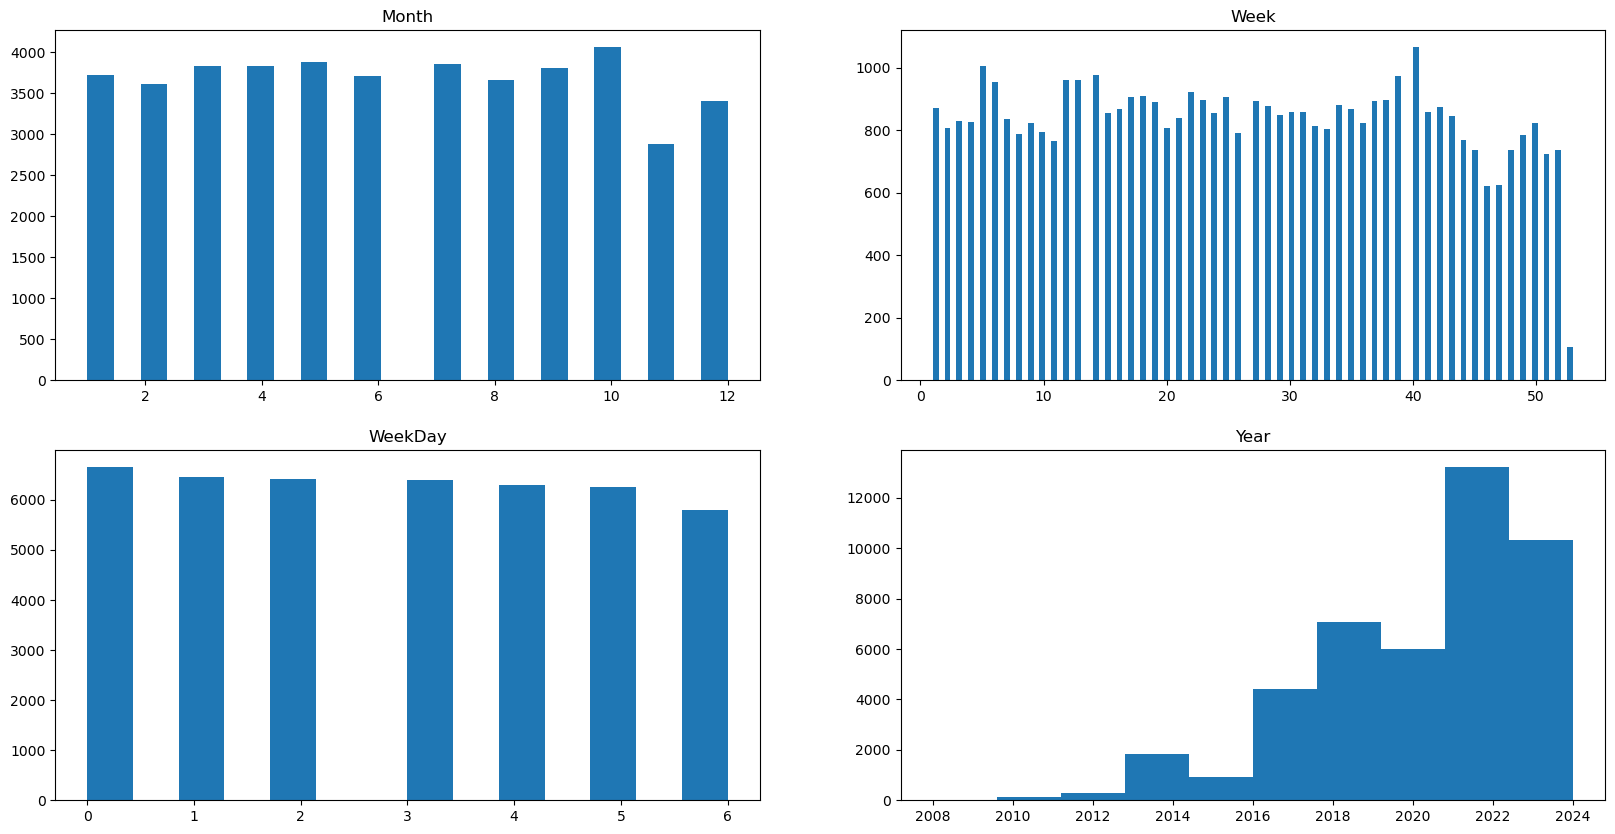

In [294]:
#Distribution of Weekdays,Week,month,Year
fig,ax = plt.subplots(nrows= 2 ,ncols=2,figsize=(20, 10))


ax[0,0].hist(x = repos["Month"],bins = 24)
ax[0,0].set_title("Month")

ax[0,1].hist(x = repos["Week"],bins = 108 )
ax[0,1].set_title("Week")

ax[1,0].hist(x = repos["WeekDay"],bins = 14 )
ax[1,0].set_title("WeekDay")


ax[1,1].hist(x = repos["Year"])
ax[1,1].set_title("Year")

plt.show()

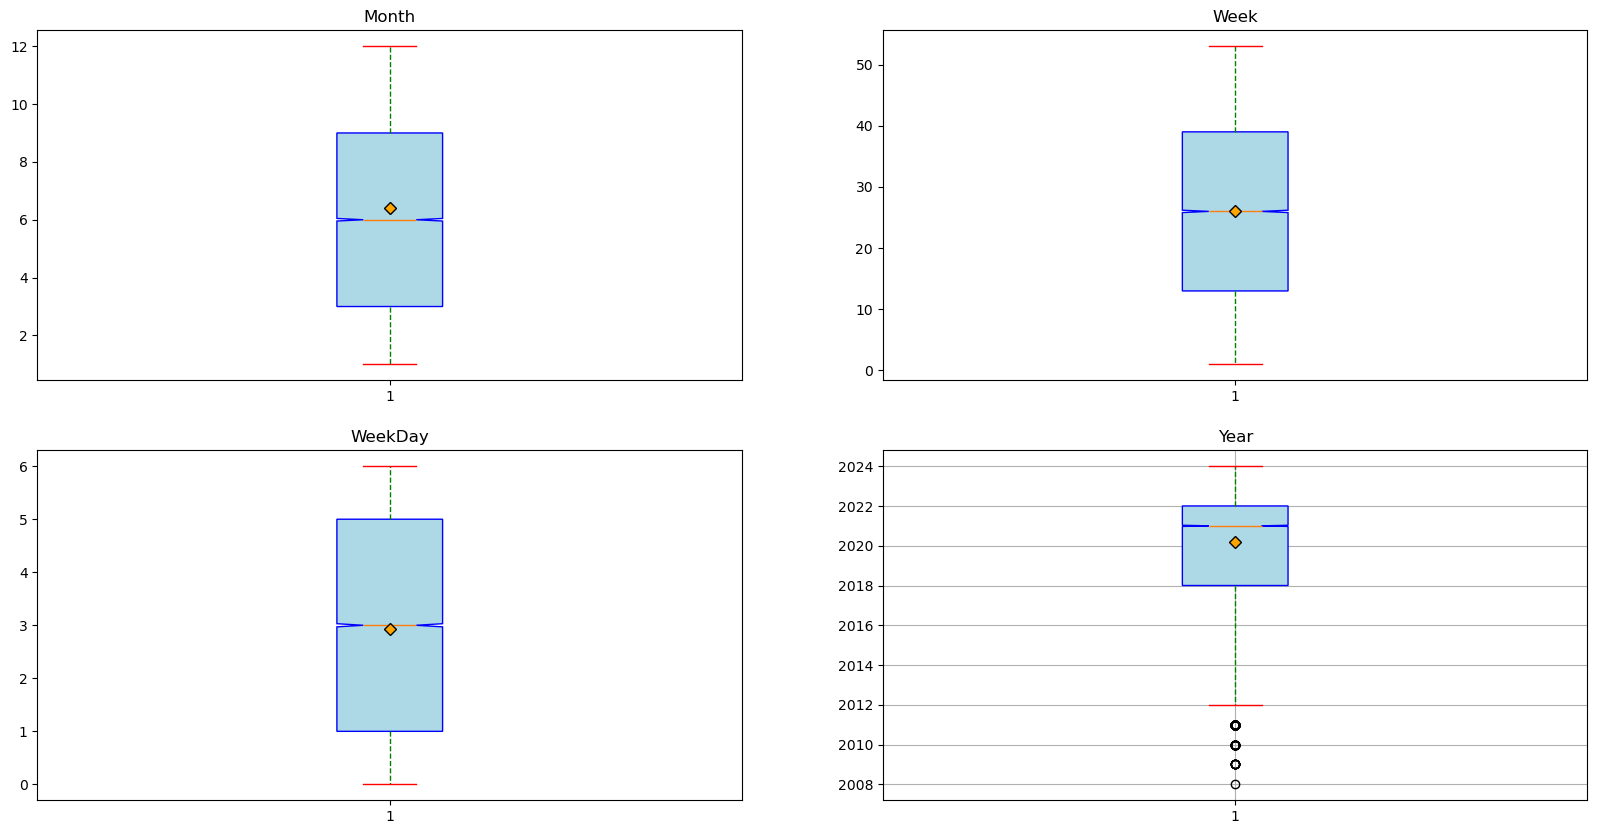

In [295]:
fig,ax = plt.subplots(nrows= 2 ,ncols=2,figsize=(20, 10))


ax[0,0].boxplot(x = repos["Month"],
            patch_artist=True,                 # Fill the boxes
            notch=True,                        # Add notches
            showfliers=True,                   # Show outliers
            showmeans=True,                    # Show the mean
            boxprops=dict(facecolor="lightblue", color="blue"),   # Customize box
            meanprops=dict(marker="D", markerfacecolor="orange", markeredgecolor="black"),  # Customize mean
            whiskerprops=dict(color="green", linestyle="--"),    # Customize whiskers
            capprops=dict(color="red") )
ax[0,0].set_title("Month")

ax[0,1].boxplot(x = repos["Week"],
            patch_artist=True,                 # Fill the boxes
            notch=True,                        # Add notches
            showfliers=True,                   # Show outliers
            showmeans=True,                    # Show the mean
            boxprops=dict(facecolor="lightblue", color="blue"),   # Customize box
            meanprops=dict(marker="D", markerfacecolor="orange", markeredgecolor="black"),  # Customize mean
            whiskerprops=dict(color="green", linestyle="--"),    # Customize whiskers
            capprops=dict(color="red") )
ax[0,1].set_title("Week")

ax[1,0].boxplot(x = repos["WeekDay"],
            patch_artist=True,                 # Fill the boxes
            notch=True,                        # Add notches
            showfliers=True,                   # Show outliers
            showmeans=True,                    # Show the mean
            boxprops=dict(facecolor="lightblue", color="blue"),   # Customize box
            meanprops=dict(marker="D", markerfacecolor="orange", markeredgecolor="black"),  # Customize mean
            whiskerprops=dict(color="green", linestyle="--"),    # Customize whiskers
            capprops=dict(color="red")  )
ax[1,0].set_title("WeekDay")


ax[1,1].boxplot(x = repos["Year"],
            patch_artist=True,                 # Fill the boxes
            notch=True,                        # Add notches
            showfliers=True,                   # Show outliers
            showmeans=True,                    # Show the mean
            boxprops=dict(facecolor="lightblue", color="blue"),   # Customize box
            meanprops=dict(marker="D", markerfacecolor="orange", markeredgecolor="black"),  # Customize mean
            whiskerprops=dict(color="green", linestyle="--"),    # Customize whiskers
            capprops=dict(color="red") )
ax[1,1].set_title("Year")

plt.grid(True)

plt.show()

In [296]:
repos.describe()

,stargazers_count,watchers_count,Week,WeekDay,Month,Year
count,44265.000000,44265.000000,44265.000000,44265.000000,44265.000000,44265.000000
mean,4.847261,4.847261,26.026387,2.929425,6.398441,2020.204609
std,167.409232,167.409232,14.796892,1.990282,3.394094,2.845286
min,0.000000,0.000000,1.000000,0.000000,1.000000,2008.000000
25%,0.000000,0.000000,13.000000,1.000000,3.000000,2018.000000
50%,0.000000,0.000000,26.000000,3.000000,6.000000,2021.000000
75%,1.000000,1.000000,39.000000,5.000000,9.000000,2022.000000
max,24398.000000,24398.000000,53.000000,6.000000,12.000000,2024.000000


In [297]:
#The distribution of the Week Nos, Weekday and Month follow a near uniform Distribution as sugessted by the graphs as well the std.div

In [298]:
total_stars = repos["stargazers_count"].sum()
stars_language = []
for i in repos["language"].unique():
    stars_language.append((i,repos[repos["language"] == i]["stargazers_count"].sum()))
stars_language = sorted(stars_language,key=lambda x : x[1],reverse=True)

#Top Five Languages In respected to the Stars
for i in stars_language:
    print(i[0],i[1]*100/total_stars)

Python 30.07680692007979
JavaScript 12.97608172852855
NaN 11.61937696910945
TypeScript 6.674465427564736
Jupyter Notebook 5.498592494547082
C# 4.640573441956712
Java 3.9848250405473427
TSQL 3.4605059562647975
HTML 3.059227083760556
Objective-C 2.5083424992076955
Swift 2.333103409705263
C++ 2.198877724128931
Dart 1.963982774370351
CSS 1.2770082586081541
Shell 1.0980406778397123
Rust 1.0029641505564773
C 0.9661452993046363
Kotlin 0.8561548069573647
Svelte 0.7773904289629201
PHP 0.7219291213810332
Go 0.5606718741261348
Ruby 0.30433809958800173
Vue 0.22464159877705486
Matlab 0.18502637907570701
Lua 0.1193117205122947
Elixir 0.11371898361328088
MATLAB 0.10253350981525326
SCSS 0.06338435152215656
Dockerfile 0.060587983072649655
R 0.053597061948882384
Makefile 0.04893644786637087
TeX 0.04800432504986857
Solidity 0.04287764955910591
Smali 0.030293991536324828
ActionScript 0.02423519322905986
Modelica 0.02330307041255756
Scilab 0.021904886187804104
Verilog 0.0200406405547995
Perl 0.019574579146

In [299]:
Watcher_language = []
for i in repos["language"].unique():
    Watcher_language.append((i,repos[repos["language"] == i]["watchers_count"].sum()))
Watcher_language = sorted(Watcher_language,key=lambda x : x[1],reverse=True)
Watcher_language[0:6]    


[('Python', 64534),
 ('JavaScript', 27842),
 ('NaN', 24931),
 ('TypeScript', 14321),
 ('Jupyter Notebook', 11798),
 ('C#', 9957)]

In [300]:
stars_license = []
for i in repos["license_name"].unique():
    stars_license.append((i,repos[repos["license_name"] == i]["stargazers_count"].sum()))
stars_license = sorted(stars_license,key=lambda x : x[1],reverse=True)
stars_license[0:6]
for i in stars_license:
    print(i[0],i[1]*100/total_stars)

mit 32.7930128073675
NaN 29.926269085214667
gpl-3.0 26.064484256445628
odbl-1.0 3.4483883596502674
apache-2.0 2.9790645215413583
other 2.2669226897335992
cc0-1.0 0.7396394548945769
bsd-3-clause 0.6781193490054249
agpl-3.0 0.30853265226226206
unlicense 0.2521392218638728
bsd-2-clause 0.1766372737271863
gpl-2.0 0.1221080889618016
cc-by-sa-4.0 0.11604929065453665
mpl-2.0 0.041013403926101304
wtfpl 0.021904886187804104
lgpl-2.1 0.01584608788053914
cc-by-4.0 0.015380026472287988
lgpl-3.0 0.010253350981525326
bsl-1.0 0.006524859715516116
isc 0.006058798307264965
0bsd 0.004194552674260361
artistic-2.0 0.002796368449506907
epl-2.0 0.0013981842247534535
ncsa 0.0009321228165023024
zlib 0.0009321228165023024
osl-3.0 0.0004660614082511512
mit-0 0.0004660614082511512
ms-pl 0.0004660614082511512
epl-1.0 0.0
upl-1.0 0.0
eupl-1.2 0.0
postgresql 0.0
ecl-2.0 0.0


In [301]:

contingency_table = pd.crosstab( repos['has_projects'],repos['has_wiki'])
print(contingency_table)
def cramers_v(confusion_matrix):
    """Calculate Cramér's V statistic for a confusion matrix."""
    chi2 = chi2_contingency(confusion_matrix)[0]  
    n = confusion_matrix.sum()                      # Total number of observations
    r, k = confusion_matrix.shape                    # Dimensions of the matrix
    phi2 = chi2 / n                                  # Phi-squared
    rcorr = r - (r - 1) * (phi2 * phi2)             # Corrected r
    kcorr = k - (k - 1) * (phi2 * phi2)             # Corrected k
    return np.sqrt(phi2 / min(kcorr - 1, rcorr - 1))

# Calculate Cramér's V for the contingency table
cramers_v_value = cramers_v(contingency_table.values)
print(f"Cramér's V: {cramers_v_value}")



has_wiki      False  True 
has_projects              
False           108     17
True           3430  40710
Cramér's V: 0.1531204891151608


In [302]:
contingency_table = pd.crosstab( repos['license_name'],repos['language'])
print(contingency_table)

cramers_v_value = cramers_v(contingency_table.values)
print(f"Cramér's V: {cramers_v_value}")

language      ANTLR  ASL  ASP  ASP.NET  ActionScript  AngelScript  ApacheConf  \
license_name                                                                    
0bsd              0    0    0        0             0            0           0   
NaN               1    4    8        2             5            0           1   
agpl-3.0          0    0    0        0             0            0           0   
apache-2.0        0    0    0        0             0            1           0   
artistic-2.0      0    0    0        0             0            0           0   
bsd-2-clause      0    0    0        0             0            0           0   
bsd-3-clause      0    0    0        0             0            0           0   
bsl-1.0           0    0    0        0             0            0           0   
cc-by-4.0         0    0    0        0             0            0           0   
cc-by-sa-4.0      0    0    0        0             0            0           0   
cc0-1.0           0    0    

In [303]:
#Visualizaton for  Users
Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   login         726 non-null    object             
 1   name          726 non-null    object             
 2   location      726 non-null    object             
 3   language      726 non-null    object             
 4   email         726 non-null    object             
 5   hireable      726 non-null    object             
 6   bio           726 non-null    object             
 7   public_repos  726 non-null    int64              
 8   followers     726 non-null    int64              
 9   following     726 non-null    int64              
 10  created_at    726 non-null    datetime64[ns, UTC]
 11  company       726 non-null    object             
 12  Week          726 non-null    int64              
 13  WeekDay       726 non-null    int64              
 14  Month     

In [304]:
Users.head()

,login,name,location,language,email,hireable,bio,public_repos,followers,following,created_at,company,Week,WeekDay,Month,Year
0,0xRoneet,Roneet Yadav,Navi-Mumbai,NaN,NaN,NaN,Prgrammer || Coder,38,102,145,2022-10-27 10:24:51+00:00,NaN,43,3,10,2022
1,1407arjun,Arjun Sivaraman,"Mumbai, Maharashtra, India",NaN,NaN,NaN,20 | MERN Stack Developer | AppDev and WebDev,67,79,71,2021-01-02 14:30:45+00:00,"VELLOREINSTITUTEOFTECHNOLOGY,VELLORE",53,5,1,2021
2,5arthak01,Sarthak Agrawal,Navi Mumbai,NaN,sarthak.agrawal@research.iiit.ac.in,True,CS Undergrad at IIIT Hyderabad,27,54,90,2020-01-24 08:51:50+00:00,NaN,4,4,1,2020
3,9vishwashah,VISHWA ALPESH SHAH,navi mumbai india,NaN,NaN,NaN,I am currently pursuing Diploma in AI&ML (Comp...,13,61,395,2022-04-22 13:13:53+00:00,"AGNELPOLYTECHNIC,VASHI",16,4,4,2022
4,a7r3,Arvindraj,"Mumbai, India",NaN,arvindultimate7352@gmail.com,NaN,Full-time .NET Full-stack developer\r\nAndroid...,54,53,21,2015-09-28 15:07:34+00:00,SCRIBT@DEVSATGST,40,0,9,2015


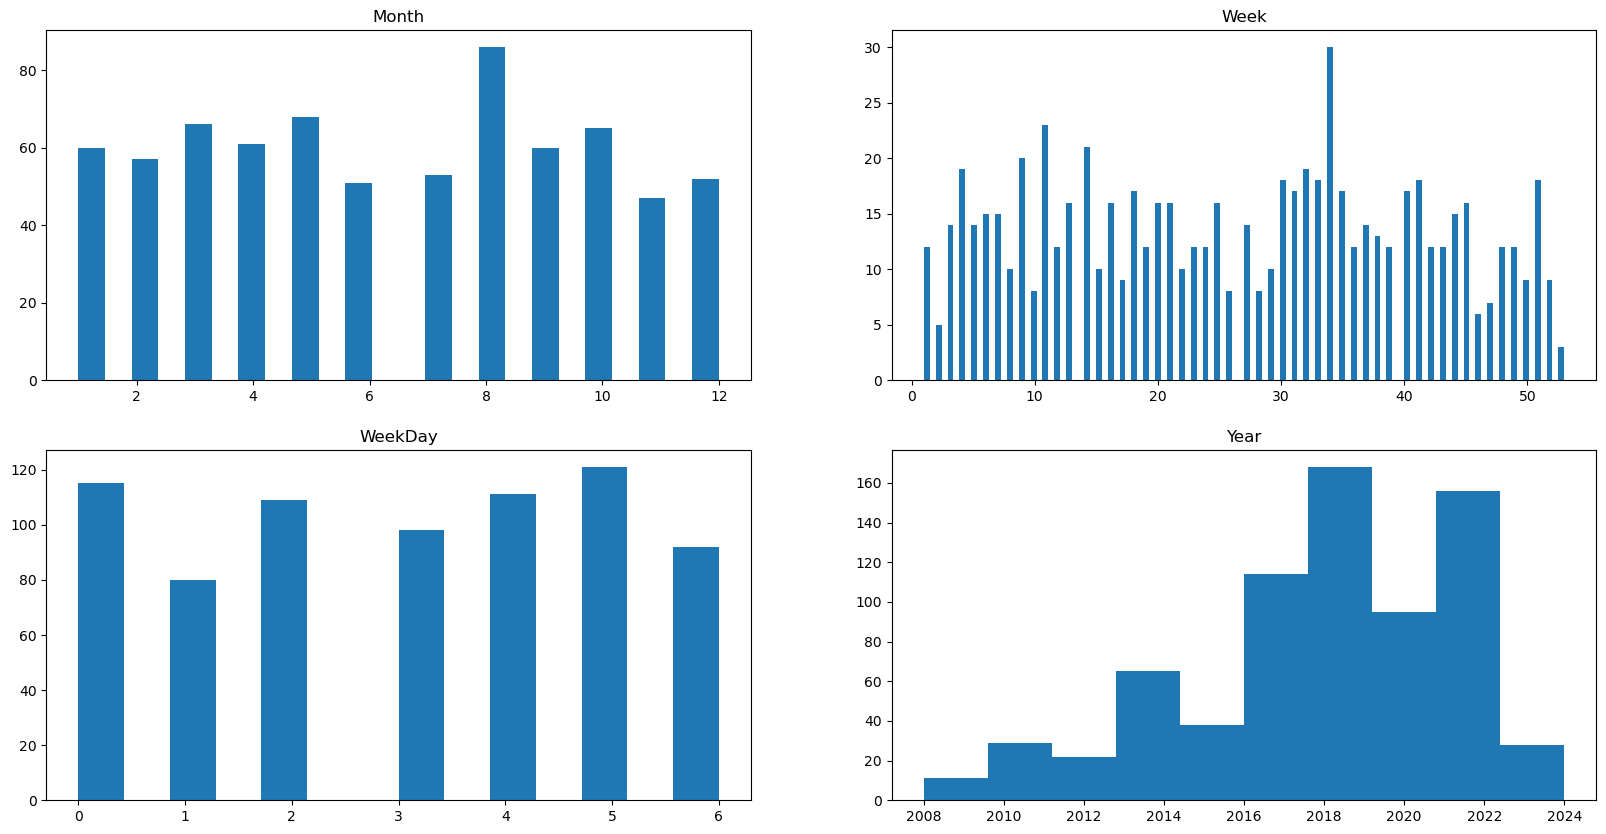

In [305]:
#Distribution of Weekdays,Week,month,Year
fig,ax = plt.subplots(nrows= 2 ,ncols=2,figsize=(20, 10))


ax[0,0].hist(x = Users["Month"],bins = 24)
ax[0,0].set_title("Month")

ax[0,1].hist(x = Users["Week"],bins = 108 )
ax[0,1].set_title("Week")

ax[1,0].hist(x = Users["WeekDay"],bins = 14 )
ax[1,0].set_title("WeekDay")


ax[1,1].hist(x = Users["Year"])
ax[1,1].set_title("Year")

plt.show()

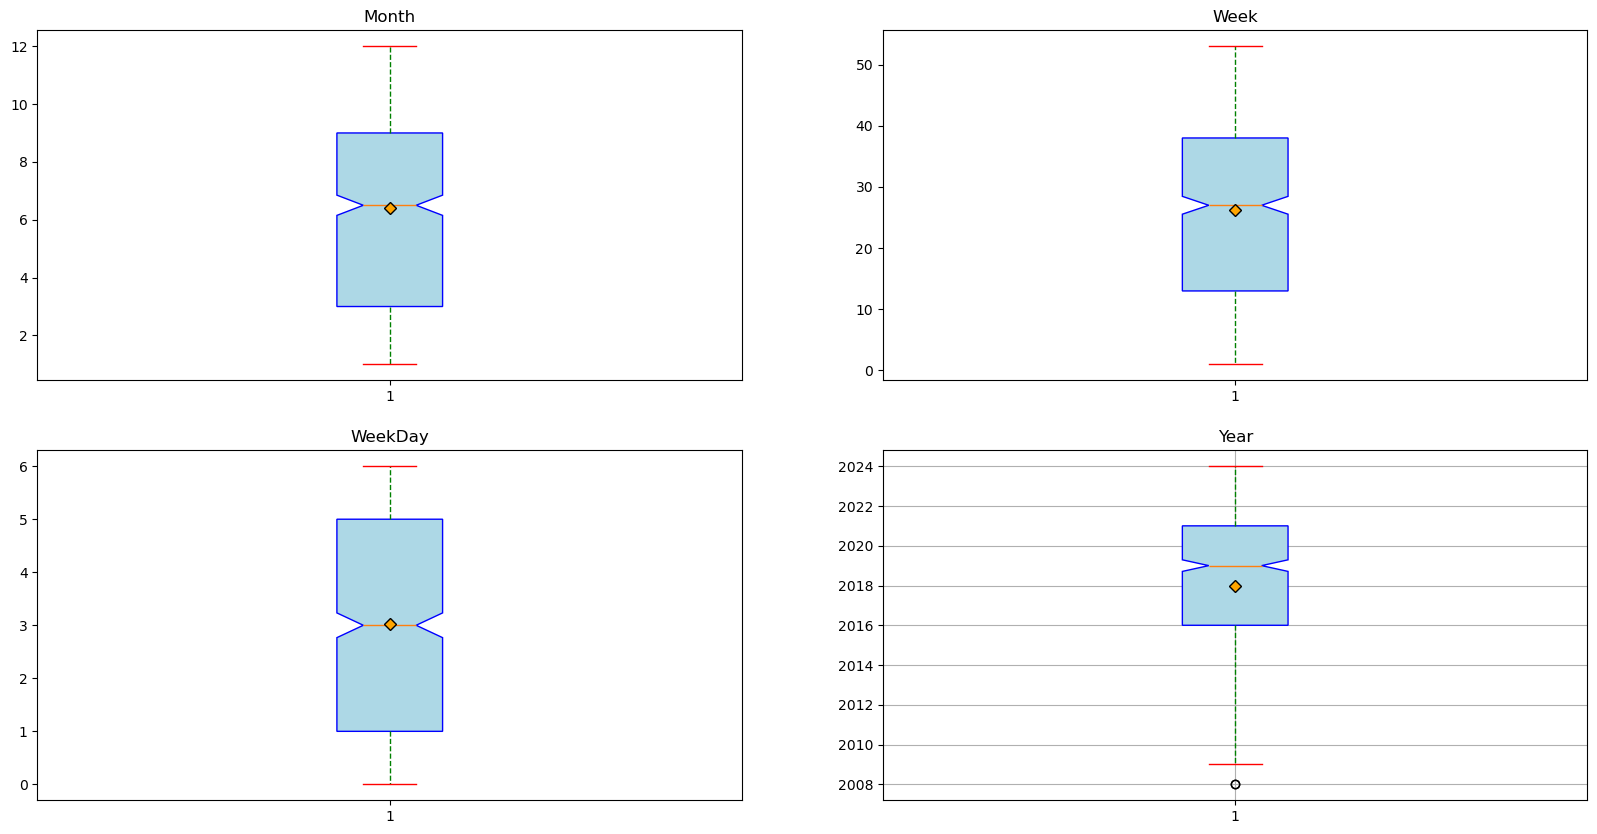

In [306]:
fig,ax = plt.subplots(nrows= 2 ,ncols=2,figsize=(20, 10))


ax[0,0].boxplot(x = Users["Month"],
            patch_artist=True,                 # Fill the boxes
            notch=True,                        # Add notches
            showfliers=True,                   # Show outliers
            showmeans=True,                    # Show the mean
            boxprops=dict(facecolor="lightblue", color="blue"),   # Customize box
            meanprops=dict(marker="D", markerfacecolor="orange", markeredgecolor="black"),  # Customize mean
            whiskerprops=dict(color="green", linestyle="--"),    # Customize whiskers
            capprops=dict(color="red") )
ax[0,0].set_title("Month")

ax[0,1].boxplot(x = Users["Week"],
            patch_artist=True,                 # Fill the boxes
            notch=True,                        # Add notches
            showfliers=True,                   # Show outliers
            showmeans=True,                    # Show the mean
            boxprops=dict(facecolor="lightblue", color="blue"),   # Customize box
            meanprops=dict(marker="D", markerfacecolor="orange", markeredgecolor="black"),  # Customize mean
            whiskerprops=dict(color="green", linestyle="--"),    # Customize whiskers
            capprops=dict(color="red") )
ax[0,1].set_title("Week")

ax[1,0].boxplot(x = Users["WeekDay"],
            patch_artist=True,                 # Fill the boxes
            notch=True,                        # Add notches
            showfliers=True,                   # Show outliers
            showmeans=True,                    # Show the mean
            boxprops=dict(facecolor="lightblue", color="blue"),   # Customize box
            meanprops=dict(marker="D", markerfacecolor="orange", markeredgecolor="black"),  # Customize mean
            whiskerprops=dict(color="green", linestyle="--"),    # Customize whiskers
            capprops=dict(color="red")  )
ax[1,0].set_title("WeekDay")


ax[1,1].boxplot(x = Users["Year"],
            patch_artist=True,                 # Fill the boxes
            notch=True,                        # Add notches
            showfliers=True,                   # Show outliers
            showmeans=True,                    # Show the mean
            boxprops=dict(facecolor="lightblue", color="blue"),   # Customize box
            meanprops=dict(marker="D", markerfacecolor="orange", markeredgecolor="black"),  # Customize mean
            whiskerprops=dict(color="green", linestyle="--"),    # Customize whiskers
            capprops=dict(color="red") )
ax[1,1].set_title("Year")

plt.grid(True)

plt.show()

In [313]:
Users["leadership"] = Users["followers"]/(1 + Users["following"])
Users.sort_values(by="leadership",ascending=False).head(10)
#Majorirty of Top 10 users are of Famous Tech Youtubers

,login,name,location,language,email,hireable,bio,public_repos,followers,following,created_at,company,Week,WeekDay,Month,Year,leadership
311,kovidgoyal,Kovid Goyal,"Mumbai, India",NaN,NaN,NaN,Principal developer of calibre and kitty,37,4296,0,2012-01-06 05:38:24+00:00,NaN,1,4,1,2012,4296.000000
141,coding-parrot,Gaurav Sen,"Mumbai, India",NaN,NaN,NaN,CEO of InterviewReady,11,2416,0,2020-01-03 14:13:35+00:00,INTERVIEWREADY,1,4,1,2020,2416.000000
219,gkcs,Gaurav,Mumbai,NaN,gauravsen92@gmail.com,NaN,A software engineer passionate about AI and Co...,9,2181,0,2015-01-12 09:14:38+00:00,DIRECTI,3,0,1,2015,2181.000000
587,slidenerd,slidenerd,Mumbai,NaN,slidenerd@gmail.com,True,"Bots, AI, advanced web frameworks, ohlc applic...",113,3168,1,2013-08-01 14:17:19+00:00,SLIDENERD,31,3,8,2013,1584.000000
181,dmalvia,Dipesh Malvia,Mumbai,NaN,cs.dipeshmalvia@gmail.com,True,Technology Consultant | YouTuber | Passionate ...,61,822,0,2014-08-25 09:50:02+00:00,NaN,35,0,8,2014,822.000000
150,darshilparmar,Darshil Parmar,Mumbai,NaN,NaN,True,Freelance Data Engineer and YouTuber.\r\nI lov...,53,1481,2,2016-10-11 15:42:41+00:00,NaN,41,1,10,2016,493.666667
59,amangoeliitb,Aman Goel,"Mumbai, India",NaN,NaN,NaN,Computer Science and Engineering undergrad,12,477,0,2014-02-08 05:04:29+00:00,ALLINCALLRESEARCHANDSOLUTIONSPVTLTD,6,5,2,2014,477.000000
575,shyamseshadri,Shyam Seshadri,"Navi Mumbai, India",NaN,shyamseshadri@gmail.com,True,NaN,19,439,0,2010-03-24 17:37:06+00:00,FUNDOOSOLUTIONSPVT.LTD.,12,2,3,2010,439.000000
124,Bhaviktutorials,Bhavik Oza,Mumbai,NaN,NaN,True,Tech without complications\r\n,18,425,0,2020-04-20 17:51:22+00:00,BHAVIKTUTORIALS,17,0,4,2020,425.000000
107,ashkulz,Ashish Kulkarni,"Mumbai, India",NaN,NaN,NaN,NaN,8,395,0,2011-06-16 15:23:28+00:00,TEAMSIMPLEPAY,24,3,6,2011,395.000000


In [ ]:
#TDS Questions

In [314]:
top_5_users = Users.sort_values(by="followers",ascending=False).head(5)
list(top_5_users["login"])

['ValentineFernandes',
 'kovidgoyal',
 'slidenerd',
 'aryashah2k',
 'coding-parrot']

In [315]:
oldest_5_users = Users.sort_values(by="created_at").head(5)
list(oldest_5_users["login"])

['ivank', 'sandeepshetty', 'svs', 'nitinhayaran', 'nischal']

In [316]:
repos["license_name"].unique()
top_5_license = repos["license_name"].value_counts()
list(top_5_license[0:6].index)

['NaN', 'mit', 'apache-2.0', 'other', 'gpl-3.0', 'bsd-3-clause']

In [317]:
Users["company"].value_counts()

company
NaN                         321
MASAISCHOOL                  14
BROWSERSTACK                 13
FRAPPE                       10
IITBOMBAY                     9
                           ... 
USETOPRANK                    1
POSTMAN                       1
HTTPS://WWW.DJSCE.AC.IN/      1
IITKANPUR                     1
ZING42                        1
Name: count, Length: 334, dtype: int64

In [318]:
repos["language"].value_counts()

language
NaN            12398
JavaScript      8312
Python          4304
HTML            2927
Java            2429
               ...  
RAML               1
Liquid             1
Mathematica        1
Bicep              1
GAP                1
Name: count, Length: 140, dtype: int64

In [ ]:

Users['created_at'] = pd.to_datetime(Users['created_at'])


users_after_2020 = Users[Users['Year'] > 2020]


merged_df = pd.merge(users_after_2020[['login']], repos[['login', 'language']], on='login', how='inner')

merged_df = merged_df[merged_df["language"] != "NaN"]
merged_df["language"].value_counts().index[1]


'HTML'

In [342]:
repos.groupby(by = "language")["stargazers_count"].mean().sort_values(ascending=False).head(1)

language
TSQL    571.153846
Name: stargazers_count, dtype: float64

In [343]:
Users["leadership"] = Users["followers"] / (1 + Users["following"]) 
list(Users.sort_values(by = "leadership",ascending=False).head(5)["login"])


['kovidgoyal', 'coding-parrot', 'gkcs', 'slidenerd', 'dmalvia']

In [347]:
Users[["followers","public_repos"]].corr()

,followers,public_repos
followers,1.000000,0.034463
public_repos,0.034463,1.000000


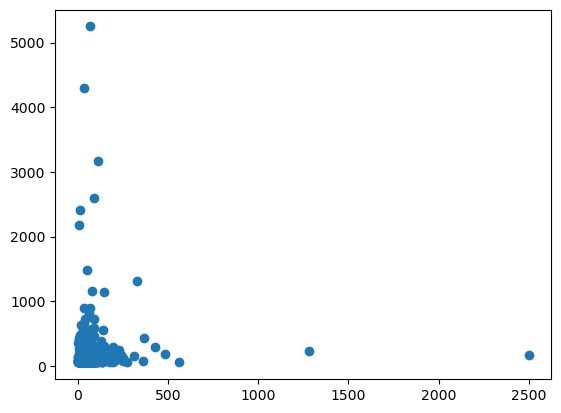

In [350]:
fig,ax = plt.subplots(1,1)
ax.scatter(y = Users["followers"],x = Users["public_repos"])
plt.show()

In [353]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(Users[["followers"]],Users["public_repos"])
model.coef_

array([0.01178393])

In [47]:
repos[["has_projects","has_wiki"]].corr()

,has_projects,has_wiki
has_projects,1.000000,0.153863
has_wiki,0.153863,1.000000


In [360]:
print(Users[Users["hireable"] == True]["following"].mean())
print(Users[Users["hireable"] == "NaN"]["following"].mean())
Users[Users["hireable"] == True]["following"].mean()-Users[Users["hireable"] == "NaN"]["following"].mean()

129.96703296703296
121.87637969094922


8.090653276083742

In [376]:
Users["LengthBio"] = Users["bio"].apply(lambda x : len(x.replace(" ","")))

In [378]:
Users.head()

,login,name,location,language,email,hireable,bio,public_repos,followers,following,created_at,company,Week,WeekDay,Month,Year,leadership,BioStriped,LengthBio
0,0xRoneet,Roneet Yadav,Navi-Mumbai,NaN,NaN,NaN,Prgrammer || Coder,38,102,145,2022-10-27 10:24:51+00:00,NaN,43,3,10,2022,0.698630,Prgrammer||Coder,16
1,1407arjun,Arjun Sivaraman,"Mumbai, Maharashtra, India",NaN,NaN,NaN,20 | MERN Stack Developer | AppDev and WebDev,67,79,71,2021-01-02 14:30:45+00:00,"VELLOREINSTITUTEOFTECHNOLOGY,VELLORE",53,5,1,2021,1.097222,20|MERNStackDeveloper|AppDevandWebDev,37
2,5arthak01,Sarthak Agrawal,Navi Mumbai,NaN,sarthak.agrawal@research.iiit.ac.in,True,CS Undergrad at IIIT Hyderabad,27,54,90,2020-01-24 08:51:50+00:00,NaN,4,4,1,2020,0.593407,CSUndergradatIIITHyderabad,26
3,9vishwashah,VISHWA ALPESH SHAH,navi mumbai india,NaN,NaN,NaN,I am currently pursuing Diploma in AI&ML (Comp...,13,61,395,2022-04-22 13:13:53+00:00,"AGNELPOLYTECHNIC,VASHI",16,4,4,2022,0.154040,IamcurrentlypursuingDiplomainAI&ML(ComputerEng...,141
4,a7r3,Arvindraj,"Mumbai, India",NaN,arvindultimate7352@gmail.com,NaN,Full-time .NET Full-stack developer\r\nAndroid...,54,53,21,2015-09-28 15:07:34+00:00,SCRIBT@DEVSATGST,40,0,9,2015,2.409091,Full-time.NETFull-stackdeveloper\r\nAndroid&Li...,57


In [390]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(Users[["followers"]],Users["LengthBio"])
model.coef_

array([0.00027274])

In [389]:
repos[(repos["WeekDay"]==0) | (repos["WeekDay"]==5) | (repos["WeekDay"]==6)]["login"].value_counts().index[0:5]

Index(['mohd14shoeb', 'vinod1988', 'patilswapnilv', 'Kushal334',
       'rajeshpillai'],
      dtype='object', name='login')

In [397]:
len(Users[(Users["email"]!="NaN")&(Users["hireable"] == True)])/len(Users) - len(Users[(Users["email"]!="NaN")&(Users["hireable"] == "NaN")])/len(Users)

-0.011019283746556474

0.23553719008264462